# Data Preprocessing

## Importing libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler



## Importing Dataset

In [2]:
data=pd.read_csv(r"C:\Users\babua\Downloads\Employee.csv")
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


## Data Exploration

In [3]:
data.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [5]:
data.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [6]:
data.shape

(148, 6)

In [7]:
#unique values
lengths = {}
for feature in data.columns:
    unique_values = data[feature].unique()
    lengths[feature] = {'unique_values': unique_values, 'length': len(unique_values)}
for feature, info in lengths.items():
    print(f"Feature: {feature}")
    print(f"Unique values: {info['unique_values']}")
    print(f"Number of unique values: {info['length']}")
    print("-" * 30)

Feature: Company
Unique values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of unique values: 7
------------------------------
Feature: Age
Unique values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of unique values: 30
------------------------------
Feature: Salary
Unique values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of unique values: 41
------------------------------
Feature: Place
Unique values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of unique values: 12
------------------------------
Feature: Country
Unique values: ['India']
Number of unique values: 1
-

In [8]:
#renaming columns
data.rename(columns={"Company":"Company Name"},inplace=True)
data.rename(columns={"Place":"Location"},inplace=True)

In [9]:
data.head()

,Company Name,Age,Salary,Location,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


## Data Cleaning

In [10]:
#finding number of missing values in each feature
data.isnull().sum()

Company Name     8
Age             18
Salary          24
Location        14
Country          0
Gender           0
dtype: int64

In [11]:
#finding duplicates
duplicates=data[data.duplicated()]
duplicates


,Company Name,Age,Salary,Location,Country,Gender
84,CTS,43.0,NaN,Mumbai,India,0
130,TCS,21.0,4824.0,Mumbai,India,0
131,Infosys,NaN,5835.0,Mumbai,India,0
144,Infosys,22.0,8787.0,Calcutta,India,1


In [12]:
#removing duplicates
data.drop_duplicates()

,Company Name,Age,Salary,Location,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [13]:
#finding outliers
Q1 = data['Salary'].quantile(0.25)
Q3 = data['Salary'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Salary'] < lower_bound) | (data['Salary'] > upper_bound)]
outliers


,Company Name,Age,Salary,Location,Country,Gender


In [14]:
#finding outliers
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]
outlier


,Company Name,Age,Salary,Location,Country,Gender


In [15]:
data['Age'].replace(0, np.nan, inplace=True)

In [16]:
# replacing missing values with mean values
data["Age"].fillna(data["Age"].mean(),inplace=True)
data["Salary"].fillna(data["Salary"].mean(),inplace=True)
data["Company Name"].fillna("Unknown",inplace=True)
data["Location"].fillna("Unknown",inplace=True)
data["Gender"].fillna(0,inplace=True)



In [17]:
data.tail(5)

,Company Name,Age,Salary,Location,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


## Data Analysis

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  148 non-null    object 
 1   Age           148 non-null    float64
 2   Salary        148 non-null    float64
 3   Location      148 non-null    object 
 4   Country       148 non-null    object 
 5   Gender        148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [19]:
#data filtering
filtered_data=data[(data["Age"]>40)&(data["Salary"]<5000)]
filtered_data

,Company Name,Age,Salary,Location,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


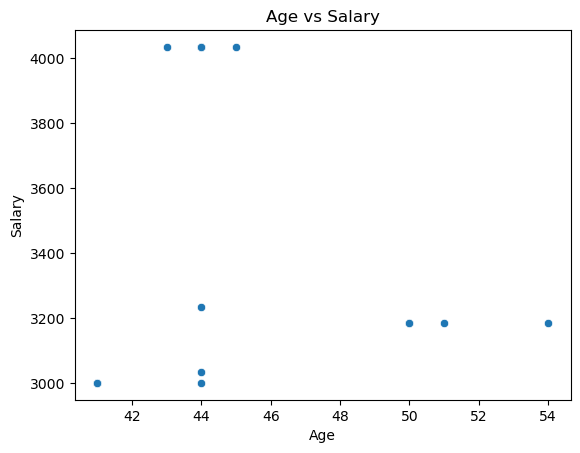

In [20]:
#scatter plot 
sns.scatterplot(x="Age",y="Salary",data=filtered_data)
plt.title("Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()


In [21]:
data_count=data["Location"].value_counts()
data_count

Mumbai        37
Calcutta      33
Chennai       14
Delhi         14
Unknown       14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: Location, dtype: int64

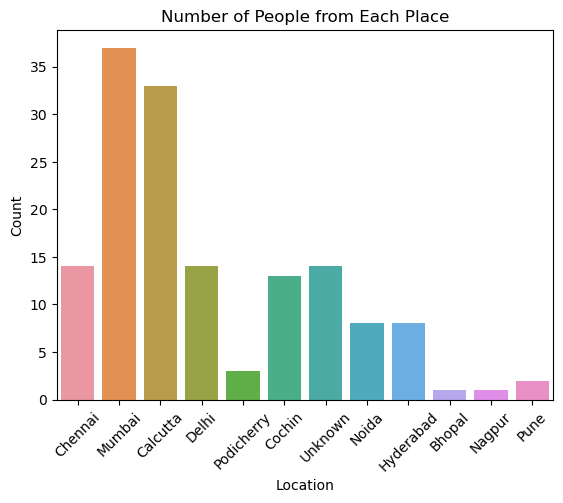

In [23]:
sns.countplot(x="Location",data=data)
plt.title("Number of People from Each Place")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Data Encoding

In [27]:
#one hot encoding
encoded_data=pd.get_dummies(data,columns=["Company Name","Location"])
encoded_data

,Age,Salary,Country,Gender,Company Name_CTS,Company Name_Congnizant,Company Name_Infosys,Company Name_Infosys Pvt Lmt,Company Name_TCS,Company Name_Tata Consultancy Services,...,Location_Chennai,Location_Cochin,Location_Delhi,Location_Hyderabad,Location_Mumbai,Location_Nagpur,Location_Noida,Location_Podicherry,Location_Pune,Location_Unknown
0,20.0,5312.467742,India,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,30.0,5312.467742,India,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,35.0,2300.000000,India,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,40.0,3000.000000,India,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,23.0,4000.000000,India,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,33.0,9024.000000,India,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
144,22.0,8787.000000,India,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,44.0,4034.000000,India,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
146,33.0,5034.000000,India,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [30]:
#another method for one hot encoding
encoded_columns=["Company Name","Location"]
onehot_encode=OneHotEncoder(sparse=False,handle_unknown='ignore')
encoded_cols=onehot_encode.fit_transform(data[encoded_columns])

data_encoded=pd.DataFrame(encoded_cols)
data_onehotencoded=data.join(data_encoded)
data_onehotencoded

,Company Name,Age,Salary,Location,Country,Gender,0,1,2,3,...,9,10,11,12,13,14,15,16,17,18
0,TCS,20.0,5312.467742,Chennai,India,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Infosys,30.0,5312.467742,Mumbai,India,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,TCS,35.0,2300.000000,Calcutta,India,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Infosys,40.0,3000.000000,Delhi,India,0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TCS,23.0,4000.000000,Mumbai,India,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,TCS,33.0,9024.000000,Calcutta,India,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,Infosys,22.0,8787.000000,Calcutta,India,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,Infosys,44.0,4034.000000,Delhi,India,1,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,TCS,33.0,5034.000000,Mumbai,India,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [35]:
#label encoding
label_encoder = LabelEncoder()
encoded_data = data.copy()  # Create a copy to avoid modifying the original data
encoded_data["Company Name"] = label_encoder.fit_transform(encoded_data["Company Name"])
encoded_data["Salary"] = label_encoder.fit_transform(encoded_data["Salary"])


In [36]:
encoded_data

,Company Name,Age,Salary,Location,Country,Gender
0,4,3,21,2,0,0
1,2,10,21,6,0,0
2,4,16,3,1,0,0
3,2,20,5,4,0,0
4,4,6,12,6,0,0
...,...,...,...,...,...,...
143,4,14,38,1,0,1
144,2,5,35,1,0,1
145,2,23,13,4,0,1
146,4,14,19,6,0,1


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Company Name  148 non-null    int32
 1   Age           148 non-null    int64
 2   Salary        148 non-null    int64
 3   Location      148 non-null    int32
 4   Country       148 non-null    int32
 5   Gender        148 non-null    int64
dtypes: int32(3), int64(3)
memory usage: 5.3 KB


## Feature Scaling

In [38]:
# Feature Scaling using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)
scaled_features

array([[ 0.84843616, -1.48093712,  0.12933898, -0.85254229,  0.        ,
        -0.53568323],
       [-0.27271162, -0.43722906,  0.12933898,  0.42843496,  0.        ,
        -0.53568323],
       [ 0.84843616,  0.45737786, -1.38854223, -1.1727866 ,  0.        ,
        -0.53568323],
       [-0.27271162,  1.05378247, -1.21988876, -0.21205367,  0.        ,
        -0.53568323],
       [ 0.84843616, -1.03363366, -0.62960163,  0.42843496,  0.        ,
        -0.53568323],
       [-0.27271162, -0.13902675, -0.20796796, -1.1727866 ,  0.        ,
        -0.53568323],
       [ 0.84843616, -0.13902675,  0.55097264, -0.85254229,  0.        ,
         1.86677489],
       [-0.27271162, -1.03363366,  0.80395284,  0.42843496,  0.        ,
         1.86677489],
       [ 0.84843616,  0.30827671,  1.05693305, -1.1727866 ,  0.        ,
         1.86677489],
       [-1.3938594 ,  1.65018708,  1.47856671, -0.21205367,  0.        ,
        -0.53568323],
       [-1.3938594 , -1.03363366,  0.12933898,  0.

In [39]:
# Feature Scaling using MinMaxScaler
scaler_m = MinMaxScaler()
scaled_features_minmax = scaler_m.fit_transform(data)
scaled_features_minmax




array([[0.66666667, 0.10714286, 0.525     , 0.18181818, 0.        ,
        0.        ],
       [0.33333333, 0.35714286, 0.525     , 0.54545455, 0.        ,
        0.        ],
       [0.66666667, 0.57142857, 0.075     , 0.09090909, 0.        ,
        0.        ],
       [0.33333333, 0.71428571, 0.125     , 0.36363636, 0.        ,
        0.        ],
       [0.66666667, 0.21428571, 0.3       , 0.54545455, 0.        ,
        0.        ],
       [0.33333333, 0.42857143, 0.425     , 0.09090909, 0.        ,
        0.        ],
       [0.66666667, 0.42857143, 0.65      , 0.18181818, 0.        ,
        1.        ],
       [0.33333333, 0.21428571, 0.725     , 0.54545455, 0.        ,
        1.        ],
       [0.66666667, 0.53571429, 0.8       , 0.09090909, 0.        ,
        1.        ],
       [0.        , 0.85714286, 0.925     , 0.36363636, 0.        ,
        0.        ],
       [0.        , 0.21428571, 0.525     , 0.54545455, 0.        ,
        0.        ],
       [0.        , 0